## tmdb-movies Analysis - Exploratory Data Analysis

### Column Attributes:
- Popularity: A numeric quantity specifying the movie popularity
- Budget: The budget in which the movie was made.
- Revenue: The worldwide revenue generated by the movie.
- Original Title: The title of the movie before translation or adaptation.
- Cast: The actor name who played a role in movie
- Homepage: A link to the homepage of the movie.
- Director: The director name who direccted the movie
- Title: Title of the movie.
- Keywords: The keywords or tags related to the movie.
- Overview: A brief description of the movie.
- Runtime: The running time of the movie in minutes.
- Geners: The genre of the movie Drama, Action, Comedy ,Thriller etc.
- Production Company: The production house of the movie.
- Vote Count: The count of votes recieved.
- Vote Average: Average ratings the movie recieved.
- Date Time

- Release Date: The date on which movie was released.
- Release Year: The year on which movie was released.

The aim is to perform an Exploratory Data Analysis on the data to help uncover insights on the  different movies and budget and revenue generation of the company.

The analysis will take the following into consideration:
- Movies budget, revenue generation, Movies profit generation, rating and popularity.

In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import dateutil.parser
import re
from wordcloud import WordCloud
!pip install squarify
import squarify

pd.set_option("expand_frame_repr", True)




In [2]:
movies = pd.read_csv("tmdb-movies.csv", parse_dates = True)

In [3]:
movies.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
# Information
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#Change date column to date time
movies["release_date"] = pd.to_datetime(movies["release_date"])

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3   budget                10866 non-null  int64         
 4   revenue               10866 non-null  int64         
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

In [7]:
#Dimensions
movies.shape

(10866, 21)

In [8]:
movies.sample(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5092,12767,tt0331468,0.383316,0,21384035,Cold Creek Manor,Dennis Quaid|Sharon Stone|Stephen Dorff|Juliet...,NaN,Mike Figgis,The perfect house hides the perfect crime.,...,Wanting to escape city life for the countrysid...,118,Drama|Thriller,Touchstone Pictures,2003-09-19,54,5.3,2003,0.0,2.534762e+07
10626,40682,tt0070825,0.244874,0,0,The Train Robbers,John Wayne|Ann-Margret|Rod Taylor|Ben Johnson|...,NaN,Burt Kennedy,The gold or the grave. The young widow could l...,...,"A gunhand named Lane is hired by a widow, Mrs....",92,Action|Western,Batjac Productions|Warner Bros.,1973-02-07,13,6.8,1973,0.0,0.000000e+00
8135,11008,tt0110443,0.603120,0,0,Major Payne,Damon Wayans|Orlando Brown|Michael Ironside|Jo...,NaN,Nick Castle,He's looking for a few good men... or a few gu...,...,Major Benson Winifred Payne is being discharge...,95,Comedy|Family,Universal Pictures,1995-03-24,76,5.8,1995,0.0,0.000000e+00


In [9]:
#Columns
movies.columns.to_list()

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

#### PLotting a bar graph to compare budget and revenue before cleaning

In [10]:
comp = pd.DataFrame({"revenue": [movies.revenue.sum()],
         'budget': [movies.budget.sum()]})
comp

,revenue,budget
0,432720192875,158922868089


<AxesSubplot:>

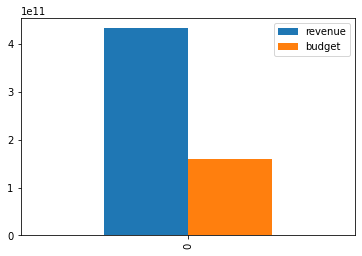

In [11]:
comp.plot(kind = 'bar')

### Data Cleaning

In [12]:
# Duplicates
movies.duplicated().sum()

1

In [13]:
#Remove duplicates
movies.drop_duplicates(inplace =True)

In [14]:
#Check for missing values
def missing_values(x):
    return (sum(x.isna()))
print("Missing values for each column: ")

print(movies.apply(missing_values).where(lambda x:x!=0).dropna())

Missing values for each column: 
imdb_id                   10.0
cast                      76.0
homepage                7929.0
director                  44.0
tagline                 2824.0
keywords                1493.0
overview                   4.0
genres                    23.0
production_companies    1030.0
dtype: float64


In [16]:
# Delete unwanted columns
movies.drop(['homepage','tagline','imdb_id','id', 'cast', 'vote_count','budget_adj','revenue_adj'], axis =1, inplace=True)
movies.sample(2)

,popularity,budget,revenue,original_title,director,keywords,overview,runtime,genres,production_companies,release_date,vote_average,release_year
171,0.880268,0,6075,Barely Lethal,Kyle Newman,assassin|high school,A 16-year-old international assassin yearning ...,96,Adventure|Action|Comedy,A24,2015-04-30,5.5,2015
3664,0.548602,4000000,1104682,Red State,Kevin Smith,christianity|homophobia|pastor|protest|christian,"Set in Middle America, a group of teens receiv...",88,Horror|Action|Thriller,The Harvey Boys|NVSH Productions,2011-08-19,5.8,2011


In [17]:
#Statistical description of the data
movies.describe()

,popularity,budget,revenue,runtime,vote_average,release_year
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,5.975012,2001.321859
std,1.000231,3.091428e+07,1.170083e+08,31.382701,0.935138,12.813260
min,0.000065,0.000000e+00,0.000000e+00,0.000000,1.500000,1960.000000
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,5.400000,1995.000000
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,6.000000,2006.000000
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9.200000,2015.000000


In [18]:
#Remove columns with zero values
movies.drop(movies[movies.revenue == 0].index , inplace =True)
movies.drop(movies[movies.budget == 0].index , inplace =True)

In [19]:
print(movies.revenue.min())
print(movies.budget.min())

2
1


In [20]:
#Fill in missing values
movies.fillna({'keywords' : 'movies.keywords.mode()', 'director' : "Other directors", 'production_companies' : 'Other'},
              inplace = True)

In [21]:
# Unique keywords used
movies.keywords.unique()

array(['monster|dna|tyrannosaurus rex|velociraptor|island',
       'future|chase|post-apocalyptic|dystopia|australia',
       'based on novel|revolution|dystopia|sequel|dystopic future', ...,
       'sheriff|ranch|liquor|settler|revolver',
       'missionary|china|us navy|chinese|battle',
       'submarine|coma|claustrophobia|wound|laser'], dtype=object)

In [22]:
# missing values
movies.isna().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
director                0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_average            0
release_year            0
dtype: int64

In [23]:
# Split columns with multiple entries
Gs = movies.genres.str.split("|" , n=1 , expand = True)
kw = movies.keywords.str.split("|",n=1, expand = True)
ot = movies.original_title.str.split("|", n=1, expand =True)
pc = movies.production_companies.str.split("|", n= 1, expand = True)

In [24]:
# Replace the column with the multiple entries with the first instance of the split
movies["Genres"] = Gs[0]
movies["Keywords"] = kw[0]
movies["Original_title"] = ot[0]
movies["Production_companies"] = pc[0]

In [25]:
#Columns
movies.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'director',
       'keywords', 'overview', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_average', 'release_year', 'Genres', 'Keywords',
       'Original_title', 'Production_companies'],
      dtype='object')

In [26]:
# Remove the replace columns
movies.drop(columns =['original_title','keywords','production_companies','genres'], inplace =True)

In [27]:
# Columns
movies.columns.to_list()

['popularity',
 'budget',
 'revenue',
 'director',
 'overview',
 'runtime',
 'release_date',
 'vote_average',
 'release_year',
 'Genres',
 'Keywords',
 'Original_title',
 'Production_companies']

In [28]:
# dimensions of the final data
movies.shape

(3854, 13)

After cleaning the data we work with 3854 rows and 15 columns

Most of the rows have been remove, which had budget and revenue entries as 0. They were not replaced with other entries because it was a large portion of the data which would have an effect on the overall output.

### Plotting a bar graph to compare revenue and budget after cleaning(Removing columns with zero)

In [29]:
com = pd.DataFrame({"revenue": [movies.revenue.sum()],
         'budget': [movies.budget.sum()]})
com

,revenue,budget
0,415024218442,143383048064


<AxesSubplot:>

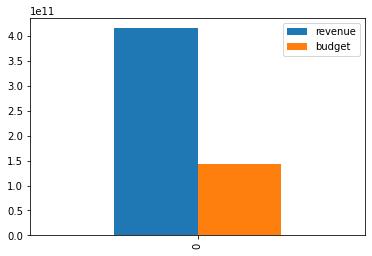

In [30]:
com.plot(kind = 'bar')

Removing rows with 0 budget and revenue values does not greatly affect the distribution of the data 
thus we proceed to Exploratory Data Analysis

### EDA

#### General Analysis

In [31]:
#Total number of movies
all =len(movies.Original_title)
print("Movies analyzed: ", all)

Movies analyzed:  3854


In [32]:
# Total Budget
Total_budget = movies.budget.sum()
print("Total budget is: {: ,}".format(Total_budget))

Total budget is:  143,383,048,064


In [33]:
# Total revenue generated
Total_revenue = movies.revenue.sum()
print("Revenue generated is: {:,}".format(Total_revenue))

Revenue generated is: 415,024,218,442


In [34]:
#Profit
Total_profit = Total_revenue - Total_budget
print("Total profit is: {:,}".format(Total_profit))

Total profit is: 271,641,170,378


In [35]:
#Most Popular Movie
hp_movie = movies.popularity.max()
movies.loc[movies.popularity == hp_movie, 'Original_title']

0    Jurassic World
Name: Original_title, dtype: object

In [36]:
# An overview of the most popular movie
movies.loc[movies.Original_title == 'Jurassic World', 'overview']

0    Twenty-two years after the events of Jurassic ...
Name: overview, dtype: object

In [37]:
# Average runtime
round(movies.runtime.mean(),2)

109.22

#### Movie analysis by budget and Profit

In [38]:
#Top 5 movies with the highest budget
df_movies = movies.nlargest(5, ['budget'])
df_movies.head()

,popularity,budget,revenue,director,overview,runtime,release_date,vote_average,release_year,Genres,Keywords,Original_title,Production_companies
2244,0.250540,425000000,11087569,Sngmoo Lee,An Asian assassin (Dong-gun Jang) is forced to...,100,2010-12-02,6.4,2010,Adventure,assassin,The Warrior's Way,Boram Entertainment Inc.
3375,4.955130,380000000,1021683000,Rob Marshall,Captain Jack Sparrow crosses paths with a woma...,136,2011-05-11,6.3,2011,Adventure,sea,Pirates of the Caribbean: On Stranger Tides,Walt Disney Pictures
7387,4.965391,300000000,961000000,Gore Verbinski,"Captain Barbossa, long believed to be dead, ha...",169,2007-05-19,6.8,2007,Adventure,ocean,Pirates of the Caribbean: At World's End,Walt Disney Pictures
14,5.944927,280000000,1405035767,Joss Whedon,When Tony Stark tries to jumpstart a dormant p...,141,2015-04-22,7.4,2015,Action,marvel comic,Avengers: Age of Ultron,Marvel Studios
6570,1.957331,270000000,391081192,Bryan Singer,"Set 5 years after the end of Superman II, the ...",154,2006-06-28,5.3,2006,Adventure,saving the world,Superman Returns,DC Comics


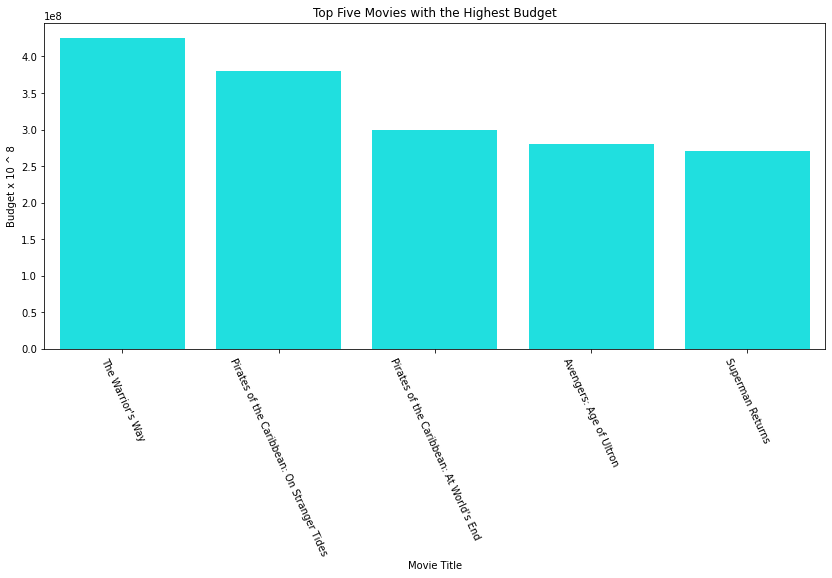

In [39]:
plt.figure(figsize=(14,6))
highest_budget = sns.barplot(x = "Original_title", y= 'budget', data = df_movies, color = "aqua")
highest_budget.set(ylabel ="Budget x 10 ^ 8")
highest_budget.set(xlabel = "Movie Title")
highest_budget.set(title = "Top Five Movies with the Highest Budget")
highest_budget.set_xticklabels(highest_budget.get_xticklabels(), rotation = -65);

The Warriors way is the top most movie with the highest budget.

In [40]:
#Lowest budget movies
df1_movies = movies.nsmallest(5, ["budget"])
df1_movies.head()

,popularity,budget,revenue,director,overview,runtime,release_date,vote_average,release_year,Genres,Keywords,Original_title,Production_companies
2618,0.090186,1,100,Jeff Pollack,A comedy about finding your true love at any p...,95,1999-04-23,4.8,1999,Comedy,restaurant,Lost & Found,Alcon Entertainment
3581,0.520430,1,1378,Dermot Mulroney,A happy newlywed marriage counselor's views on...,90,2011-06-03,5.3,2011,Comedy,wedding vows,"Love, Wedding, Marriage",120dB Films
8944,0.464188,2,16,Michael Winner,Paul Kersey is again a vigilante trying to fin...,88,1982-02-20,5.6,1982,Action,rape,Death Wish 2,Cannon Films
2398,0.028456,3,43,Taika Waititi,"It's 1984, and Michael Jackson is king - even ...",87,2010-02-14,7.3,2010,Drama,new zealand,Boy,New Zealand Film Commission
10050,0.317091,3,16,John Harrison,The first segment features an animated mummy s...,93,1990-05-03,5.8,1990,Fantasy,anthology,Tales from the Darkside: The Movie,Paramount Pictures


Text(0.5, 1.0, 'Top 5 low budget movies')

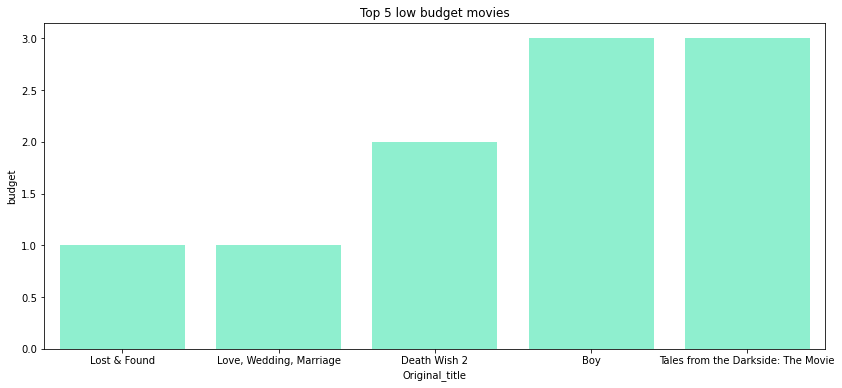

In [41]:
plt.figure(figsize =(14,6))
sns.barplot(x = "Original_title", y = "budget", data = df1_movies, color ="aquamarine")
plt.title("Top 5 low budget movies")

Lost and found is the lowest most budgeted for movie.

In [42]:
#Add a column profit
movies['profit'] = movies['revenue'] - movies['budget']
movies.sample(3)

,popularity,budget,revenue,director,overview,runtime,release_date,vote_average,release_year,Genres,Keywords,Original_title,Production_companies,profit
51,2.814802,35000000,194564672,Nancy Meyers,70-year-old widower Ben Whittaker has discover...,121,2015-09-24,7.1,2015,Comedy,intern,The Intern,Waverly Films,159564672
8058,0.194675,19000000,5656087,Jack Clayton,"In a small American town, a diabolical circus ...",95,1983-04-29,6.3,1983,Fantasy,circus,Something Wicked This Way Comes,Walt Disney Pictures,-13343913
5276,0.835336,36000000,50159144,Jonathan Mostow,When his SUV breaks down on a remote Southwest...,95,1997-05-02,6.5,1997,Drama,california,Breakdown,Paramount Pictures,14159144


In [43]:
#Top 5 highest profits
h_profit = movies.nlargest(5, "profit")
h_profit.head()

,popularity,budget,revenue,director,overview,runtime,release_date,vote_average,release_year,Genres,Keywords,Original_title,Production_companies,profit
1386,9.432768,237000000,2781505847,James Cameron,"In the 22nd century, a paraplegic Marine is di...",162,2009-12-10,7.1,2009,Action,culture clash,Avatar,Ingenious Film Partners,2544505847
3,11.173104,200000000,2068178225,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,2015-12-15,7.5,2015,Action,android,Star Wars: The Force Awakens,Lucasfilm,1868178225
5231,4.355219,200000000,1845034188,James Cameron,"84 years later, a 101-year-old woman named Ros...",194,1997-11-18,7.3,1997,Drama,shipwreck,Titanic,Paramount Pictures,1645034188
0,32.985763,150000000,1513528810,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,2015-06-09,6.5,2015,Action,monster,Jurassic World,Universal Studios,1363528810
4,9.335014,190000000,1506249360,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,2015-04-01,7.3,2015,Action,car race,Furious 7,Universal Pictures,1316249360


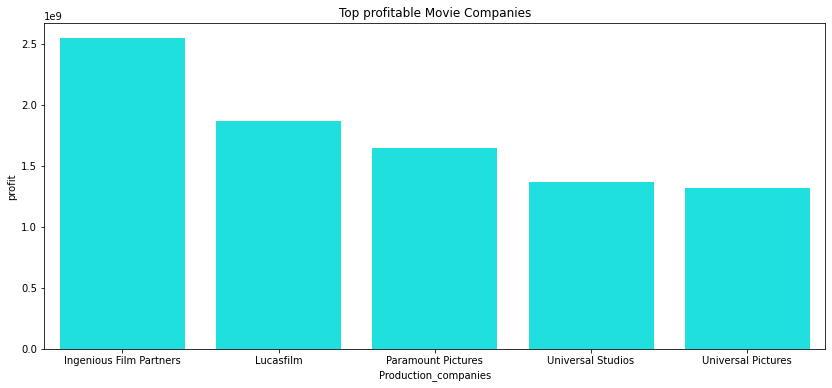

In [44]:
plt.figure(figsize = (14,6))
profit_co =sns.barplot(x = "Production_companies", y = "profit", data = h_profit, color = "aqua")
profit_co.set(title = "Top profitable Movie Companies")
profit_co.set_xticklabels(profit_co.get_xticklabels());

Ingenious Film Partners and Lucasfilm are the top movie profitable companies

#### Movies Analysis by Revenue

In [45]:
# Shortest runtime
movies.runtime.min()


15

In [46]:
# Longest runtime
movies.runtime.max()

338

Text(0.5, 1.0, 'Revenue generated by movie runtime')

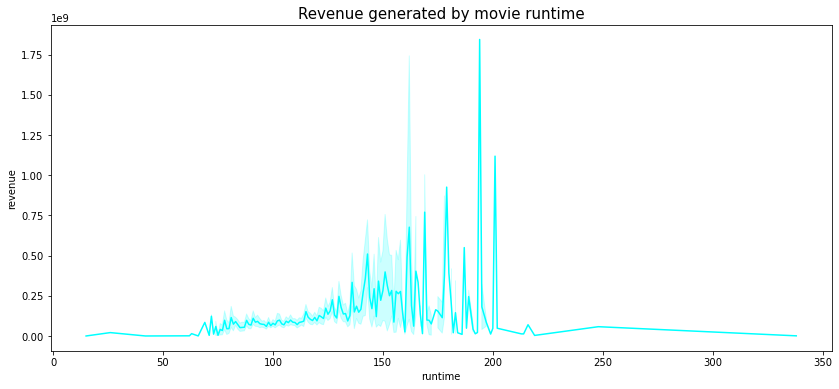

In [47]:
plt.figure(figsize=(14,6))
sns.lineplot(x ='runtime', y = 'revenue', data = movies, color = "aqua")
plt.title("Revenue generated by movie runtime", fontsize = 15)

Most movies with a runtime of between 150 to 200 generate highest revenue

Text(0.5, 1.0, 'Revenue by Year')

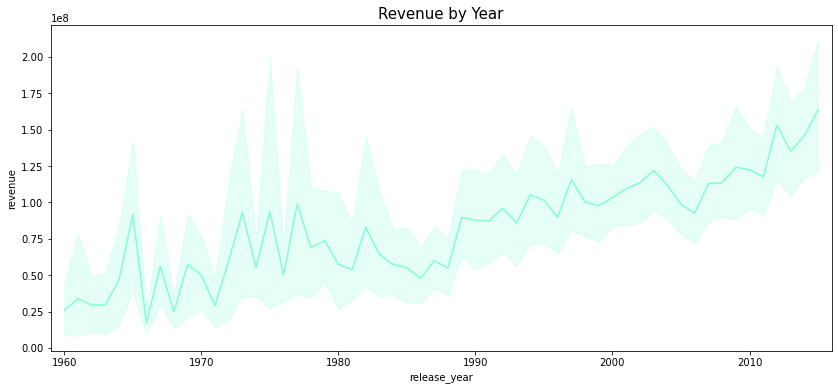

In [48]:
plt.figure(figsize=(14,6))
sns.lineplot(x ="release_year", y= "revenue", data = movies, color = "aquamarine")
plt.xlim(1959, 2016)
plt.title("Revenue by Year", fontsize = 15)

Over the years movies have increased the revenue they generate. However between 1980 and 1990 there was a significant drop in the revenue generated.

In [49]:
#Total revenue by year
df5_movies = movies.groupby("release_year")[['revenue']].sum()

In [50]:
#Bottom 5 years with the lowest revenue
hr = df5_movies['revenue'].nsmallest(5)
hr = pd.DataFrame(hr)
hr

,revenue
release_year,
1966,84736689
1960,129005000
1963,176526882
1962,206329846
1968,222221762


In [51]:
# Top five movies by revenue
df7_movies = movies.nlargest(5, "revenue")
df7_movies.head()

,popularity,budget,revenue,director,overview,runtime,release_date,vote_average,release_year,Genres,Keywords,Original_title,Production_companies,profit
1386,9.432768,237000000,2781505847,James Cameron,"In the 22nd century, a paraplegic Marine is di...",162,2009-12-10,7.1,2009,Action,culture clash,Avatar,Ingenious Film Partners,2544505847
3,11.173104,200000000,2068178225,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,2015-12-15,7.5,2015,Action,android,Star Wars: The Force Awakens,Lucasfilm,1868178225
5231,4.355219,200000000,1845034188,James Cameron,"84 years later, a 101-year-old woman named Ros...",194,1997-11-18,7.3,1997,Drama,shipwreck,Titanic,Paramount Pictures,1645034188
4361,7.637767,220000000,1519557910,Joss Whedon,When an unexpected enemy emerges and threatens...,143,2012-04-25,7.3,2012,Science Fiction,new york,The Avengers,Marvel Studios,1299557910
0,32.985763,150000000,1513528810,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,2015-06-09,6.5,2015,Action,monster,Jurassic World,Universal Studios,1363528810


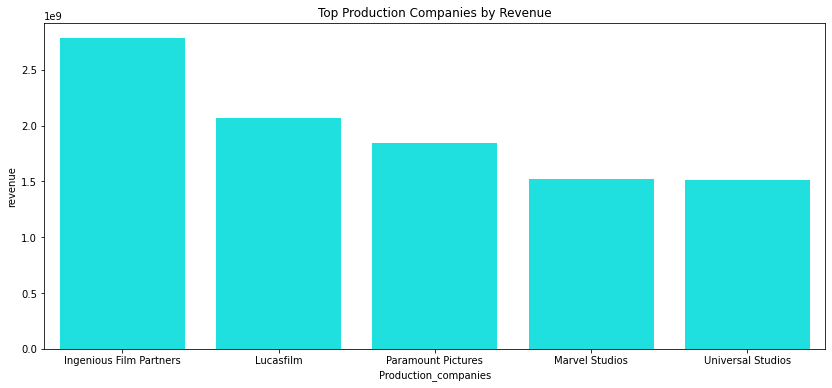

In [52]:
plt.figure(figsize=(14,6))
pc = sns.barplot(x = 'Production_companies', y = 'revenue', data = df7_movies, color = "aqua")
pc.set(title = "Top Production Companies by Revenue")
pc.set_xticklabels(pc.get_xticklabels());


The Ingenious Film Partners movie generates the highest revenue

### Relationship between the budget and the revenue

Text(0.5, 1.0, 'Relationship between budget and revenue')

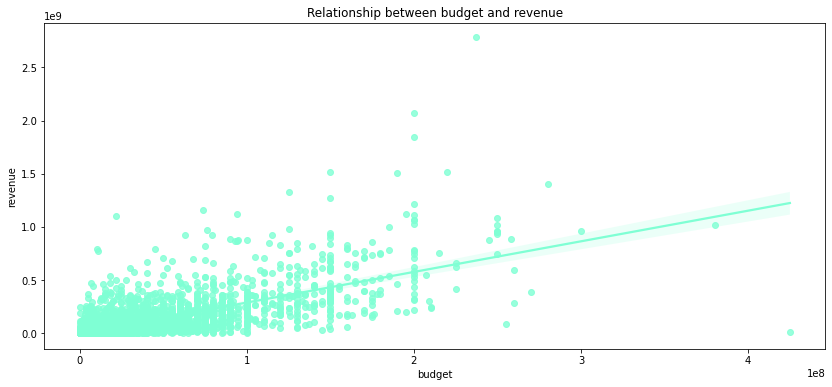

In [53]:
plt.figure(figsize = (14,6))
sns.regplot(x = 'budget', y = 'revenue', data = movies, color = "aquamarine")
plt.title("Relationship between budget and revenue")

There is a strong relationship between the budget and the revenue. Most of the movies have a low budget and yield a corresponding low revenue.

#### Movie Analysis by popularity

In [54]:
#Top 5 movies with the highest rating
df3_movies = movies.nlargest(5, ["vote_average"])
df3_movies.head()

,popularity,budget,revenue,director,overview,runtime,release_date,vote_average,release_year,Genres,Keywords,Original_title,Production_companies,profit
4178,7.192039,25000000,28341469,Frank Darabont,Framed in the 1940s for the double murder of h...,142,1994-09-10,8.4,1994,Drama,prison,The Shawshank Redemption,Castle Rock Entertainment,3341469
7948,0.283191,1200000,4978922,Jonathan Demme,David Byrne walks onto the stage and does a so...,88,1984-11-16,8.4,1984,Documentary,concert,Stop Making Sense,Talking Heads,3778922
7269,5.738034,6000000,245066411,Francis Ford Coppola,"Spanning the years 1945 to 1955, a chronicle o...",175,1972-03-15,8.3,1972,Drama,italy,The Godfather,Paramount Pictures,239066411
650,4.780419,3300000,13993093,Damien Chazelle,"Under the direction of a ruthless instructor, ...",105,2014-10-10,8.2,2014,Drama,jazz,Whiplash,Bold Films,10693093
2409,8.947905,63000000,100853753,David Fincher,A ticking-time-bomb insomniac and a slippery s...,139,1999-10-14,8.1,1999,Drama,support group,Fight Club,Regency Enterprises,37853753


In [55]:
dfa = df3_movies[["Original_title", 'vote_average']]
dfa

,Original_title,vote_average
4178,The Shawshank Redemption,8.4
7948,Stop Making Sense,8.4
7269,The Godfather,8.3
650,Whiplash,8.2
2409,Fight Club,8.1


(0.0, 100.0, 0.0, 100.0)

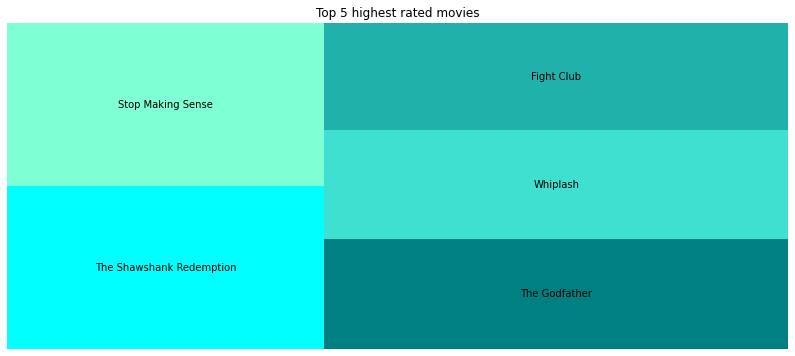

In [56]:
plt.figure(figsize =(14,6))
squarify.plot(dfa.vote_average, label = dfa.Original_title, color = ['aqua', "aquamarine","teal", "turquoise", "lightseagreen"])
plt.title("Top 5 highest rated movies")
plt.axis("off")

The Shawshank Redemption and Stop Making sense are the top most rated movies.

In [57]:
#Top 5 movies with the lowest rating
df4_movies = movies.nsmallest(5, ["vote_average"])
df4_movies
lr_movies = df4_movies[["Original_title","vote_average"]]
lr_movies

,Original_title,vote_average
4859,Foodfight!,2.2
3134,Disaster Movie,3.3
4115,FearDotCom,3.3
4540,Dracula 3D,3.3
5082,House of the Dead,3.4


Text(0.5, 1.0, 'Bottom 5 Lowest Rated movies')

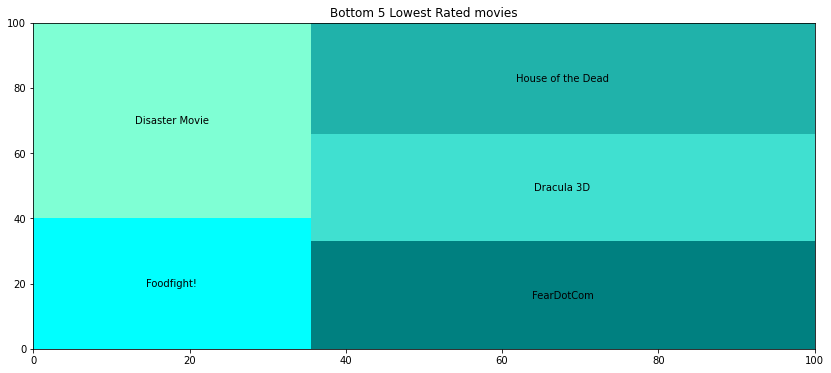

In [58]:
plt.figure(figsize=(14,6))
squarify.plot(lr_movies.vote_average, label = lr_movies.Original_title, 
              color = ['aqua', "aquamarine","teal", "turquoise", "lightseagreen"])
plt.title("Bottom 5 Lowest Rated movies")

Foodfight is the lowest rated movie.

In [59]:
# Top 5 years with the lowest revenue
df5_movies['revenue'].nlargest(5)

release_year
2015    26202922801
2013    24350666103
2012    24184456032
2014    24069969357
2011    23408245247
Name: revenue, dtype: int64

The lowest revenue was generated in 2015

In [60]:
p_movies = movies.nlargest(5, ['popularity'])
p_movies.head()

,popularity,budget,revenue,director,overview,runtime,release_date,vote_average,release_year,Genres,Keywords,Original_title,Production_companies,profit
0,32.985763,150000000,1513528810,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,2015-06-09,6.5,2015,Action,monster,Jurassic World,Universal Studios,1363528810
1,28.419936,150000000,378436354,George Miller,An apocalyptic story set in the furthest reach...,120,2015-05-13,7.1,2015,Action,future,Mad Max: Fury Road,Village Roadshow Pictures,228436354
629,24.949134,165000000,621752480,Christopher Nolan,Interstellar chronicles the adventures of a gr...,169,2014-11-05,8.0,2014,Adventure,saving the world,Interstellar,Paramount Pictures,456752480
630,14.311205,170000000,773312399,James Gunn,"Light years from Earth, 26 years after being a...",121,2014-07-30,7.9,2014,Action,marvel comic,Guardians of the Galaxy,Marvel Studios,603312399
2,13.112507,110000000,295238201,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,2015-03-18,6.3,2015,Adventure,based on novel,Insurgent,Summit Entertainment,185238201


[Text(0.5, 1.0, 'Top 5 Popular Movies')]

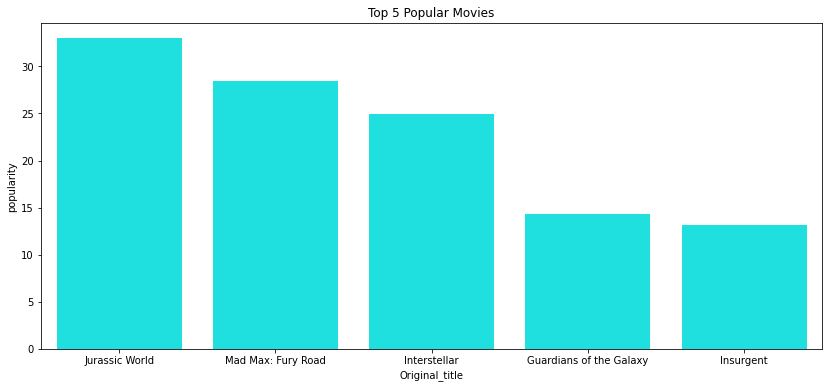

In [61]:
plt.figure(figsize=(14,6))
movies_p = sns.barplot(x = 'Original_title',  y = 'popularity', data = p_movies, color = 'aqua')
movies_p.set(title = "Top 5 Popular Movies")

Jurassic World and Mad Max are among the most popular movies

Text(0.5, 1.0, 'Top 5 Featured Directors on tmdb movies')

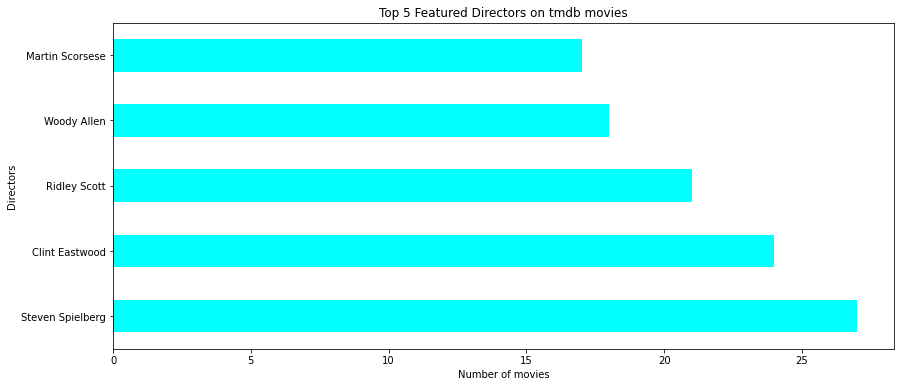

In [62]:
plt.figure(figsize = (14,6))
movies['director'].value_counts()[:5].plot(kind ='barh', color ="aqua")
plt.ylabel("Directors")
plt.xlabel("Number of movies")
plt.title("Top 5 Featured Directors on tmdb movies")

Steven Spielberg is the top featured tmbd movie director, having produced most movies.

In [63]:
movies.loc[movies['director'] == 'Steven Spielberg']

,popularity,budget,revenue,director,overview,runtime,release_date,vote_average,release_year,Genres,Keywords,Original_title,Production_companies,profit
33,3.648210,40000000,162610473,Steven Spielberg,"During the Cold War, the Soviet Union captures...",141,2015-10-15,7.1,2015,Thriller,spy,Bridge of Spies,DreamWorks SKG,122610473
1334,1.104816,20000000,303788635,Steven Spielberg,"After an encounter with UFOs, a line worker fe...",135,1977-11-16,7.0,1977,Science Fiction,indiana,Close Encounters of the Third Kind,Columbia Pictures Corporation,283788635
2638,2.971372,100000000,235926552,Steven Spielberg,"11-year-old David, the first android with huma...",146,2001-06-29,6.6,2001,Drama,ocean,A.I. Artificial Intelligence,DreamWorks SKG,135926552
2879,3.161670,185000000,786636033,Steven Spielberg,"Set during the Cold War, the Soviets â€“ led b...",122,2008-05-21,5.6,2008,Adventure,saving the world,Indiana Jones and the Kingdom of the Crystal S...,Lucasfilm,601636033
3397,2.234300,130000000,371940071,Steven Spielberg,"Intrepid young reporter, Tintin and his loyal ...",107,2011-10-25,6.6,2011,Adventure,riddle,The Adventures of Tintin,Paramount Pictures,241940071
3414,1.592819,66000000,177584879,Steven Spielberg,Follows a young man named Albert and his horse...,146,2011-12-25,6.9,2011,Drama,world war i,War Horse,DreamWorks SKG,111584879
3918,2.973115,52000000,352114312,Steven Spielberg,Frank W. Abagnale Jr. is a cunning con man â€“...,141,2002-12-25,7.6,2002,Drama,con man,Catch Me If You Can,DreamWorks SKG,300114312
3921,2.103595,102000000,358372926,Steven Spielberg,"John Anderton is a top ""Precrime"" cop in the l...",145,2002-06-20,6.9,2002,Action,self-fulfilling prophecy,Minority Report,DreamWorks SKG,256372926
4425,1.312488,65000000,275293450,Steven Spielberg,A revealing drama that focuses on the 16th Pre...,149,2012-11-09,6.6,2012,Drama,u.s. president,Lincoln,DreamWorks,210293450
5387,0.221360,36000000,74000000,Steven Spielberg,"In 1839, the slave ship Amistad set sail from ...",155,1997-12-03,6.6,1997,Drama,cuba,Amistad,DreamWorks,38000000


Although Spielberg is the most top featured director, his movies are not popular.

#### Frequently used keywords

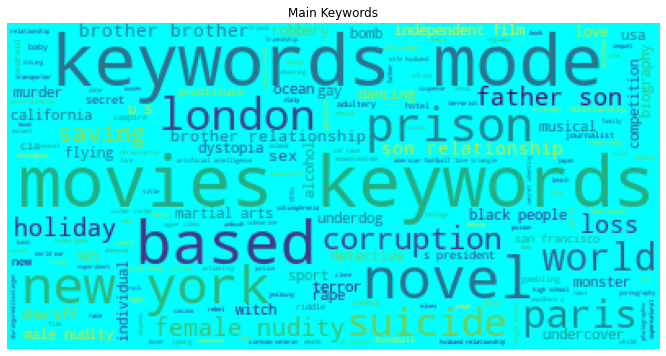

In [64]:
plt.figure(figsize=(14,6))
wordcloud = WordCloud(background_color = "aqua").generate(" ".join(movies.Keywords))
plt.title("Main Keywords")
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

### Conclusions:
- Top budget movies are not top in generating revenue.
- Movies with a runtime of between 150 and 200 mins produce the highest revenue.
- Revenue from movies has increased over the years which shows there is a demand for movies and movies are becoming a good revenue source.
- Most profitable movies are from the top production companies in terms of revenue.
- The most popular movies are not the top rated movies with them not being top in generating revenue.

### Limitations:
- The data has so many missing values on revenue and budget columns which are filled with zero. The data with zero would not be replaced as it is more than half of the data, filling it would have effect on the overall analysis. Thus the rows were removed.
- The data did not provide clear attributes of the columns especially on the revenue and budget columns. The original revenue and budget columns were used while the adj were removed.
- The revenue and budget columns do not provide a currency value.
##### Assumption: 
The final data used is a sample representation of the larger dataset.